In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)

Pnuemonia X Ray Image

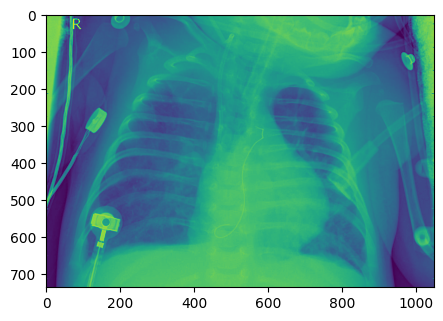

In [6]:
from glob import glob #retriving an array of files in directories
path_train = "/Users/shin/Desktop/chest_xray/train"
img = glob(path_train+"/PNEUMONIA/*.jpeg")
# print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

Normal X Ray Image

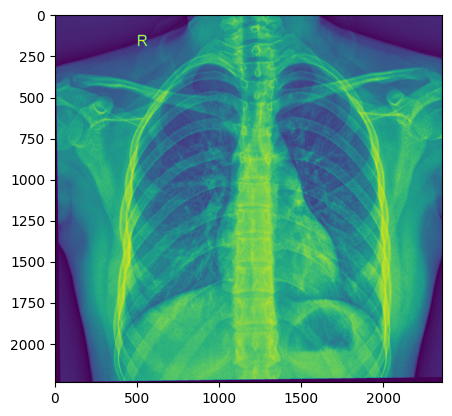

In [7]:
img = glob(path_train+"/NORMAL/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization

In [9]:
img_size=150
batch_size=25

traingen=ImageDataGenerator(rescale=1/255.,
                           rotation_range=50,
                        brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.)

In [10]:
traindata=traingen.flow_from_directory('/Users/shin/Desktop/chest_xray/train',
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='binary'
                                      ,color_mode='grayscale')

testdata=testgen.flow_from_directory('/Users/shin/Desktop/chest_xray/test',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="binary",color_mode='grayscale')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


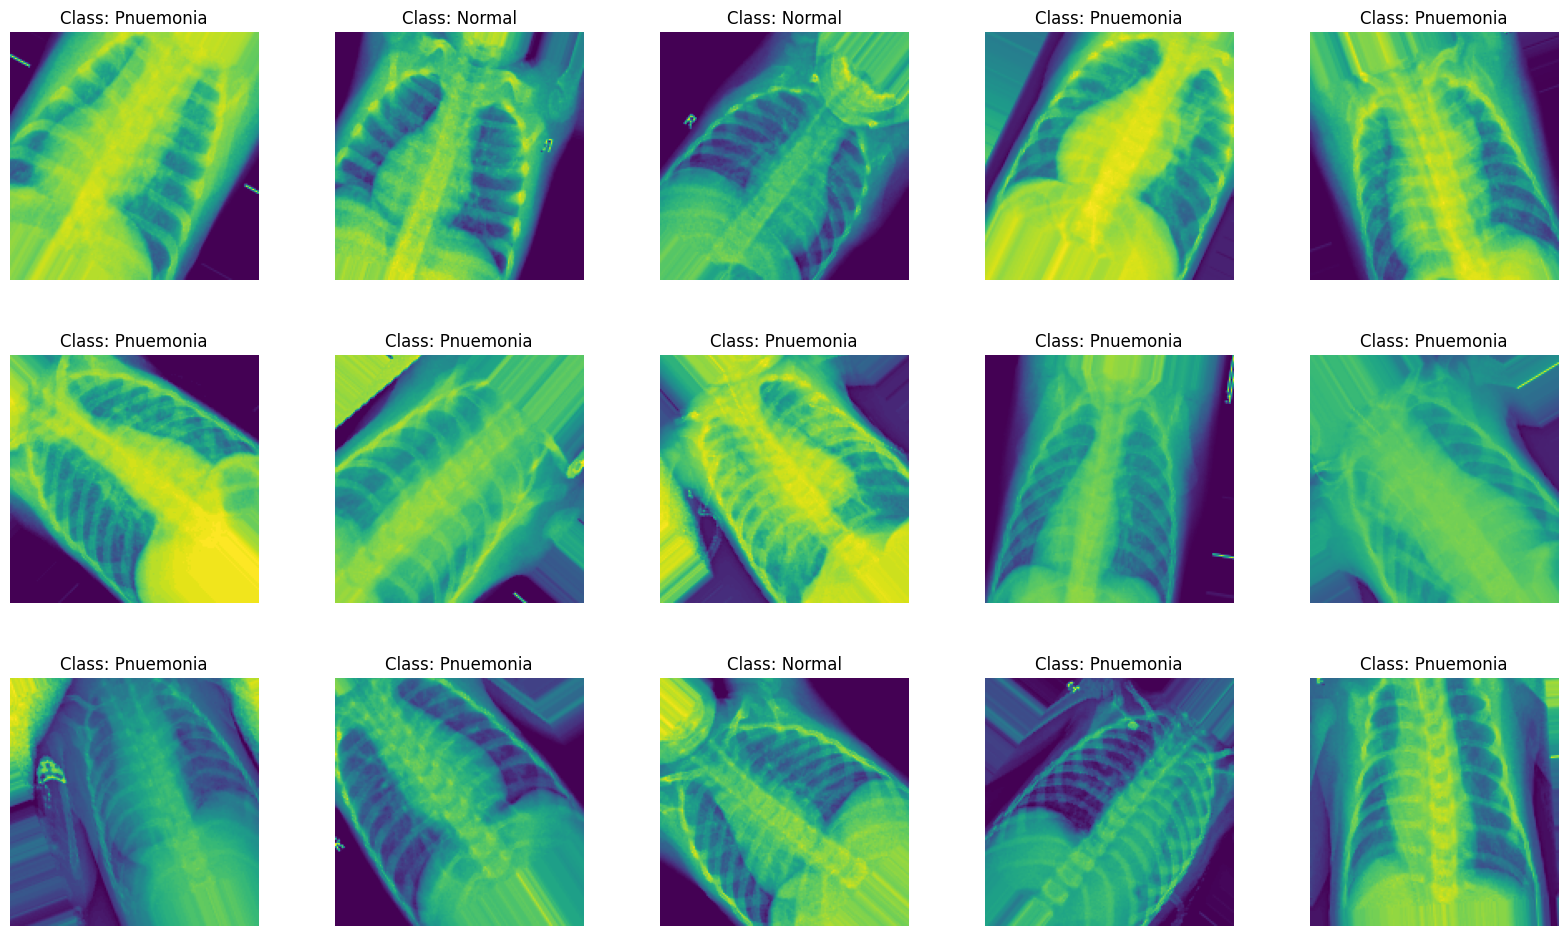

In [11]:
labels=['Normal','Pnuemonia']
samples=traindata.__next__()

images=samples[0]
target=samples[1]

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [12]:
df=pd.DataFrame(traindata.classes)
df.value_counts()

1    3883
0    1349
dtype: int64

In [13]:
df=pd.DataFrame(testdata.classes)
df.value_counts()

1    390
0    234
dtype: int64

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,1),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2),strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 128)         0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath= "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
# es = EarlyStopping(monitor='accuracy', patience=5)

In [18]:
history=model.fit(traindata,epochs=15,callbacks=[checkpoint])

Epoch 1/15
210/210 [==============================] - 30s 140ms/step - loss: 0.4788 - accuracy: 0.7777
Epoch 2/15
210/210 [==============================] - 30s 143ms/step - loss: 0.3182 - accuracy: 0.8649
Epoch 3/15
210/210 [==============================] - 30s 142ms/step - loss: 0.2705 - accuracy: 0.8855
Epoch 4/15
210/210 [==============================] - 30s 144ms/step - loss: 0.2439 - accuracy: 0.9002
Epoch 5/15
210/210 [==============================] - 31s 146ms/step - loss: 0.2199 - accuracy: 0.9106
Epoch 6/15
210/210 [==============================] - 31s 146ms/step - loss: 0.2170 - accuracy: 0.9119
Epoch 7/15
210/210 [==============================] - 31s 147ms/step - loss: 0.2044 - accuracy: 0.9186
Epoch 8/15
210/210 [==============================] - 31s 147ms/step - loss: 0.2053 - accuracy: 0.9207
Epoch 9/15
210/210 [==============================] - 31s 147ms/step - loss: 0.1988 - accuracy: 0.9209
Epoch 10/15
210/210 [==============================] - 30s 144ms/step - l

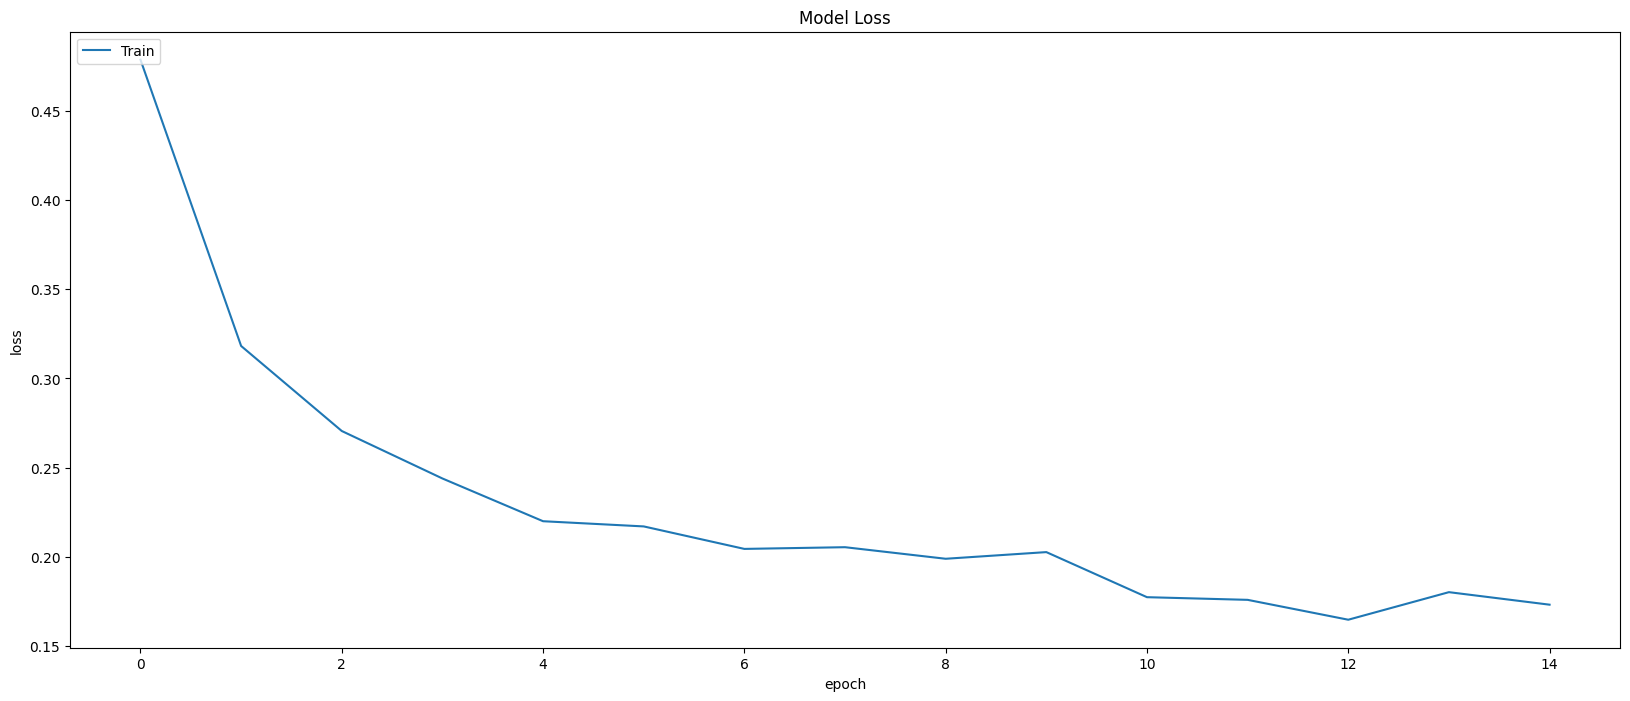

In [20]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

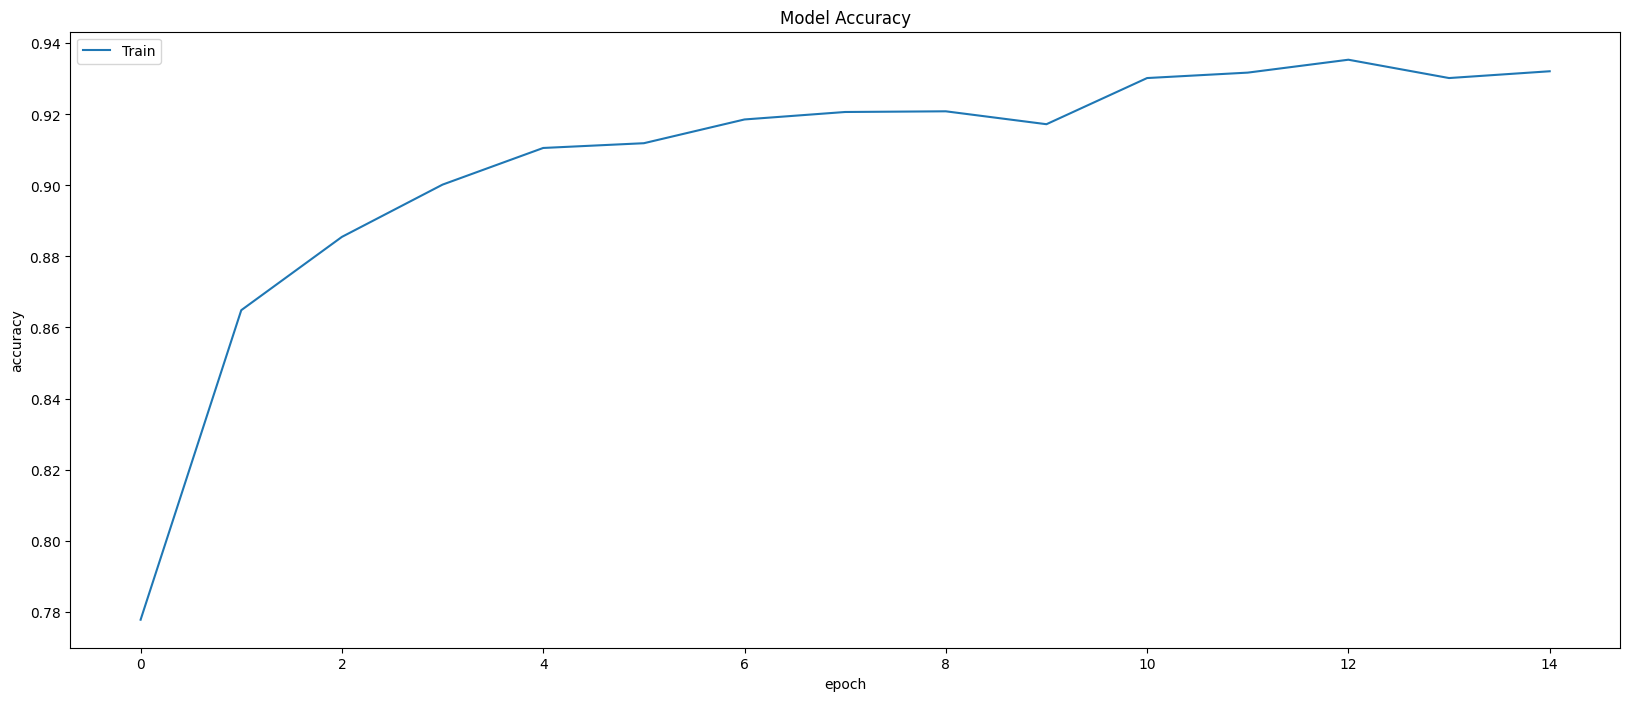

In [21]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
y_test = testdata.classes
y_pred = model.predict(testdata)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

25/25 [==============================] - 2s 90ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.75      0.79      0.77       234
   Pnuemonia       0.87      0.84      0.85       390

    accuracy                           0.82       624
   macro avg       0.81      0.81      0.81       624
weighted avg       0.82      0.82      0.82       624



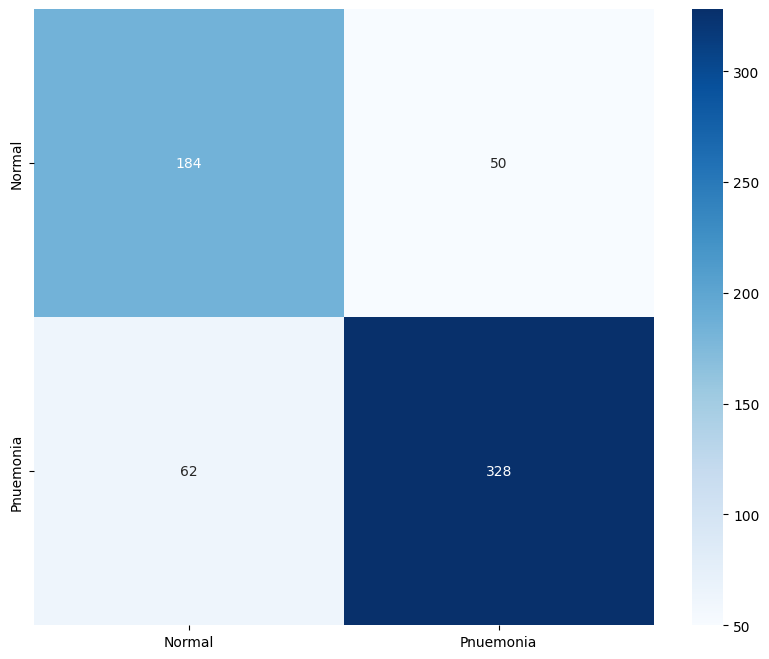

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

In [28]:
filenames = testdata.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

In [29]:
misclassification = data[data['actual_class']!=data['predicted_class']]

In [30]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)]

,filename,actual_class,predicted_class,predicted_prob
16,NORMAL/IM-0022-0001.jpeg,0,1.0,0.975125
47,NORMAL/IM-0077-0001.jpeg,0,1.0,0.984494
119,NORMAL/NORMAL2-IM-0195-0001.jpeg,0,1.0,0.989423
121,NORMAL/NORMAL2-IM-0198-0001.jpeg,0,1.0,0.975737
133,NORMAL/NORMAL2-IM-0232-0001.jpeg,0,1.0,0.984893
136,NORMAL/NORMAL2-IM-0238-0001.jpeg,0,1.0,0.964978
140,NORMAL/NORMAL2-IM-0246-0001.jpeg,0,1.0,0.966400
144,NORMAL/NORMAL2-IM-0256-0001.jpeg,0,1.0,0.996298
217,NORMAL/NORMAL2-IM-0360-0001.jpeg,0,1.0,0.961259
222,NORMAL/NORMAL2-IM-0368-0001.jpeg,0,1.0,0.927172


In [31]:
misclassification[(misclassification['actual_class']==1) & (misclassification['predicted_prob']<0.5)]

,filename,actual_class,predicted_class,predicted_prob
248,PNEUMONIA/person103_bacteria_490.jpeg,1,0.0,0.373681
254,PNEUMONIA/person108_bacteria_511.jpeg,1,0.0,0.120877
281,PNEUMONIA/person117_bacteria_556.jpeg,1,0.0,0.252019
282,PNEUMONIA/person117_bacteria_557.jpeg,1,0.0,0.397134
283,PNEUMONIA/person118_bacteria_559.jpeg,1,0.0,0.452634
...,...,...,...,...
581,PNEUMONIA/person83_bacteria_407.jpeg,1,0.0,0.024658
599,PNEUMONIA/person88_bacteria_439.jpeg,1,0.0,0.089951
601,PNEUMONIA/person8_virus_27.jpeg,1,0.0,0.262277
602,PNEUMONIA/person8_virus_28.jpeg,1,0.0,0.128740


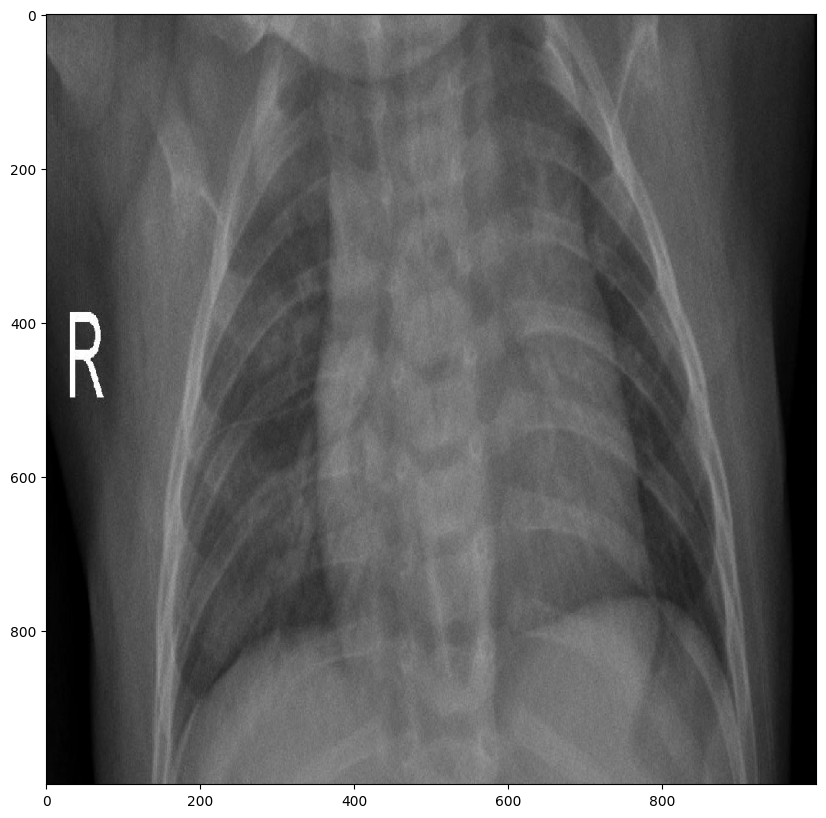

In [32]:
img = load_img('/Users/shin/Desktop/chest_xray/test/NORMAL/IM-0022-0001.jpeg',target_size=(1000,1000))
img = img_to_array(img)/255.
plt.figure(figsize = (10 , 10))
plt.imshow(img)

In [33]:
img = np.expand_dims(img,axis=0)
img.shape

(1, 1000, 1000, 3)

In [34]:
model.layers

In [35]:
feature_extractor = Model(model.inputs,model.layers[1].output)

In [37]:
features = feature_extractor.predict(testdata)
features.shape

25/25 [==============================] - 2s 90ms/step


(624, 75, 75, 32)

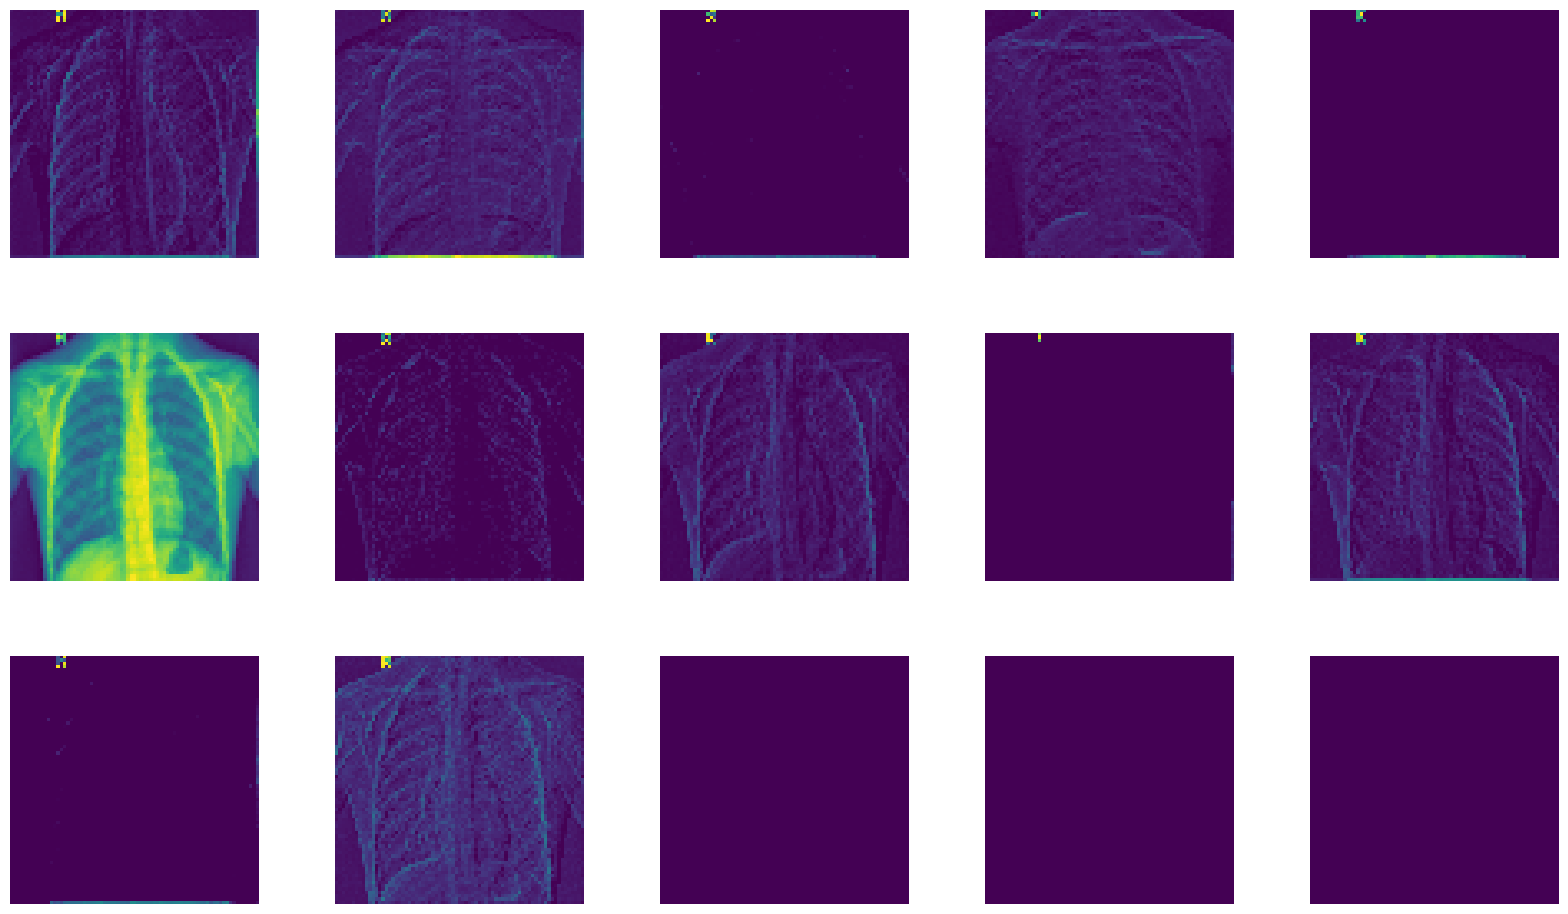

In [38]:
plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(features[0,:,:,i])
    plt.axis('off')